In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle 
%matplotlib inline

In [2]:
data =pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/Advertising.csv')

URLError: <urlopen error [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond>

In [ ]:
data.head()

In [5]:
data.to_csv('D:\sandip\Adv.csv')

In [6]:
data.shape

(200, 5)

In [8]:
data.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [11]:
data.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

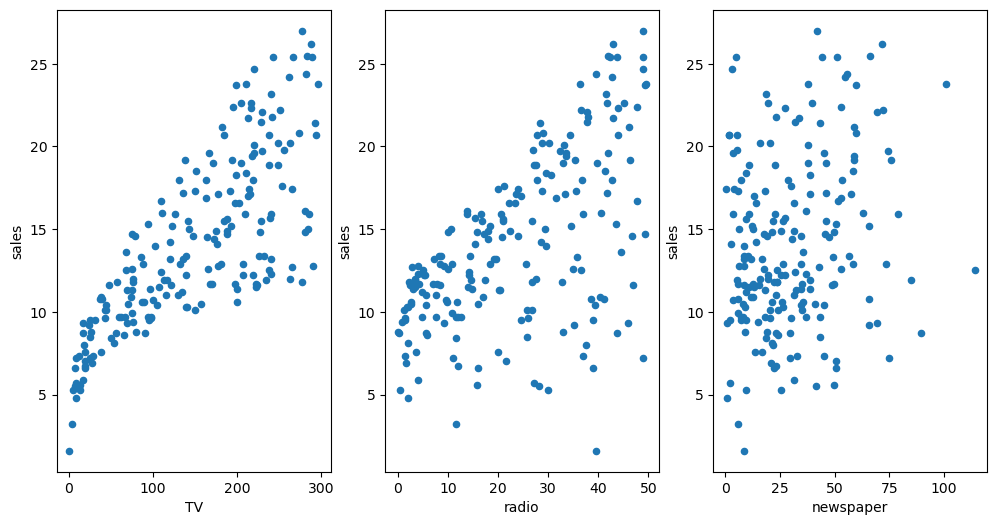

In [14]:
fig, axs=plt.subplots(1,3)
data.plot(kind='scatter',x='TV',y='sales',ax=axs[0],figsize=(12,6))
data.plot(kind='scatter',x='radio',y='sales',ax=axs[1])
data.plot(kind='scatter',x='newspaper',y='sales',ax=axs[2])
fig.savefig('testdata.jpg')

In [23]:
X=data[['TV']]
y=data.sales

from sklearn.linear_model import LinearRegression

lm=LinearRegression()

lm.fit(X, y)

LinearRegression()

In [24]:
print(lm.intercept_)
print(lm.coef_)

7.032593549127693
[0.04753664]


In [28]:
7.032594+0.0475337*50

9.409279

In [27]:
lm.predict([[50]])

C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9.40942557])

# Metrics

In [29]:
from sklearn.metrics import r2_score

In [30]:
preducted_sales=lm.predict(X)

In [31]:
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [32]:
preducted_sales

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431,
       10.17476548, 17.23871025,  8.16396559, 11.66741599, 16.73482186,
       16.32125309, 10.25557777, 20.40940417, 10.32212907, 14.03474068,
       17.41459582, 18.31779199,  7.6600772 , 17.88520856,  9.99412625,
       19.52997632, 13.82557947, 18.44614092, 18.85970969, 10.38868036,
       20.95607553, 12.39948025, 11.653155  , 19.65832525, 11.58185004,
       20.85149492, 19.72012288, 10.58358059,  9.08142275, 17.87094757,
       16.65876324, 15.44657891, 20.98935118, 16.86792445,  8.22576322,
       15.35625929, 11.2966302 , 18.43663359, 17.83291826, 10.21279479,
       16.53041431, 11.80527225, 17.31952254, 15.71278409, 19.52046899,
       16.48763133,  7.37961102, 13.50708398, 17.05331735, 17.04856369,
        9.57580381, 19.45391769, 18.4081116 , 11.91460652, 13.26464711,
       10.31262174,  8.52999772, 13.65444756, 18.31779199, 17.33

In [33]:
r2_score(y_true=y,y_pred=preducted_sales)

0.611875050850071

# Multiple Linear Regresion

In [37]:
x=data[['TV','radio','newspaper']]
from sklearn.linear_model import LinearRegression

lm=LinearRegression()

lm.fit(x, y)

LinearRegression()

In [41]:
print('Intercept    ->',lm.intercept_)
print('TV:          ->',lm.coef_[0])
print('Radio:       ->',lm.coef_[1])
print('Newspepar:   ->',lm.coef_[2])

Intercept    -> 2.9388893694594067
TV:          -> 0.04576464545539761
Radio:       -> 0.18853001691820462
Newspepar:   -> -0.0010374930424762972


# Feuture Selection

In [42]:
x=data[['TV','radio',]]
from sklearn.linear_model import LinearRegression

lm=LinearRegression()

lm.fit(x, y)

LinearRegression()

In [43]:
preducted_sales=lm.predict(x)
r2_score(y,preducted_sales)

0.8971942610828956

In [44]:
x=data[['TV','radio','newspaper']]
from sklearn.linear_model import LinearRegression

lm=LinearRegression()

lm.fit(x, y)

LinearRegression()

In [45]:
preducted_sales=lm.predict(x)
r2_score(y,preducted_sales)

0.8972106381789522

# Project 1 with Linear Regression

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pickle

import warnings
warnings.filterwarnings('ignore')


In [4]:
df=pd.read_csv('Admission.csv')

In [5]:
df.to_csv('D:\sandip\Admission.csv')

In [6]:
df

,Unnamed: 0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...,...
495,495,496,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,496,497,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,497,498,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93
498,498,499,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73


In [7]:
df.head()

,Unnamed: 0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [8]:
df.shape

(500, 10)

In [9]:
df.describe()

,Unnamed: 0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,249.500000,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,0.000000,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,124.750000,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,249.500000,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,374.250000,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,499.000000,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [10]:
df['University Rating']=df['University Rating'].fillna(df['University Rating'].mode()[0])
df['TOEFL Score']=df['TOEFL Score'].fillna(df['TOEFL Score'].mean())
df['GRE Score']=df['GRE Score'].fillna(df['GRE Score'].mean())

In [11]:
df.describe()

,Unnamed: 0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,249.500000,250.500000,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,144.481833,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,0.000000,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,124.750000,125.750000,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,249.500000,250.500000,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,374.250000,375.250000,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,499.000000,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [12]:
df.describe()

,Unnamed: 0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,249.500000,250.500000,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,144.481833,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,0.000000,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,124.750000,125.750000,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,249.500000,250.500000,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,374.250000,375.250000,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,499.000000,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [13]:
df=df.drop(columns=['Serial No.'])
df.head()

,Unnamed: 0,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


In [14]:
y=df['Chance of Admit']
x=df.drop(columns=['Chance of Admit'])

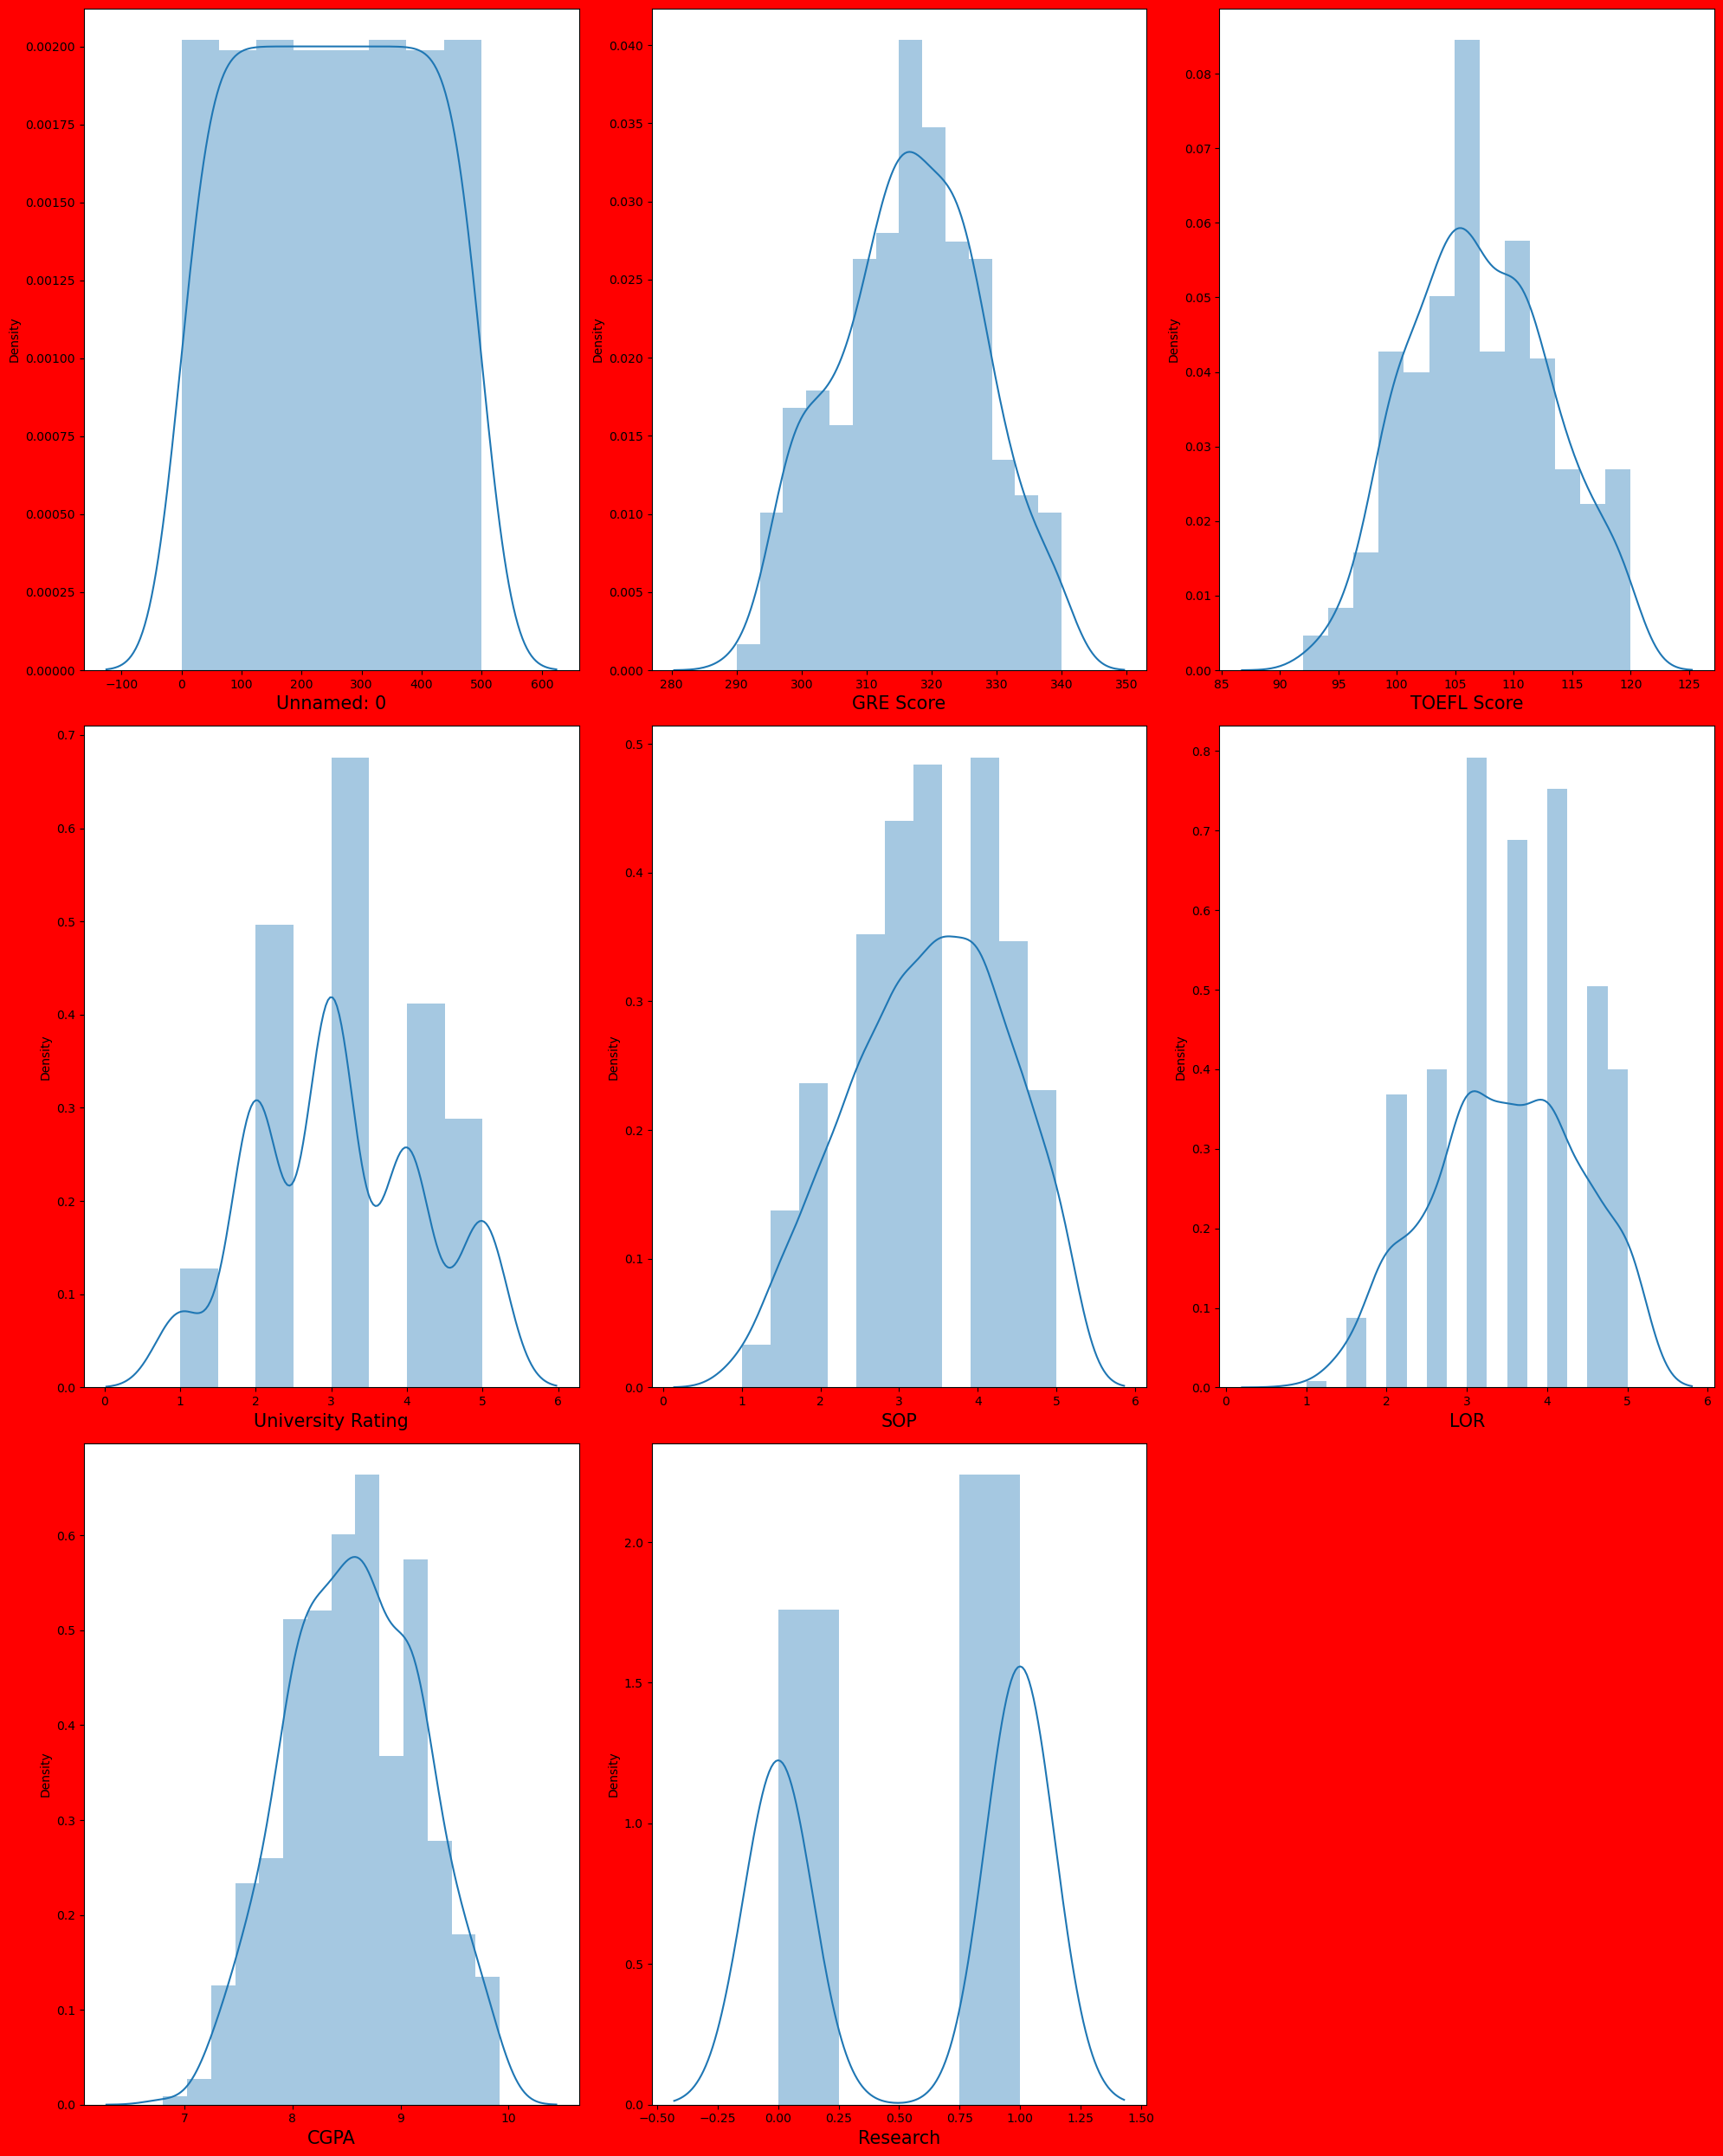

In [15]:
plt.figure(figsize=(20,25),facecolor='red')
plotnumber=1

for column in df:
    if plotnumber <=8:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=15)
        
    plotnumber+=1
plt.tight_layout()

In [16]:
y=df['Chance of Admit']
x=df.drop(columns=['Unnamed: 0','Chance of Admit'])

In [17]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.000000,118.0,4.0,4.5,4.5,9.65,1
1,324.000000,107.0,4.0,4.0,4.5,8.87,1
2,316.558763,104.0,3.0,3.0,3.5,8.00,1
3,322.000000,110.0,3.0,3.5,2.5,8.67,1
4,314.000000,103.0,2.0,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332.000000,108.0,5.0,4.5,4.0,9.02,1
496,337.000000,117.0,5.0,5.0,5.0,9.87,1
497,330.000000,120.0,5.0,4.5,5.0,9.56,1
498,312.000000,103.0,4.0,4.0,5.0,8.43,0


In [18]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

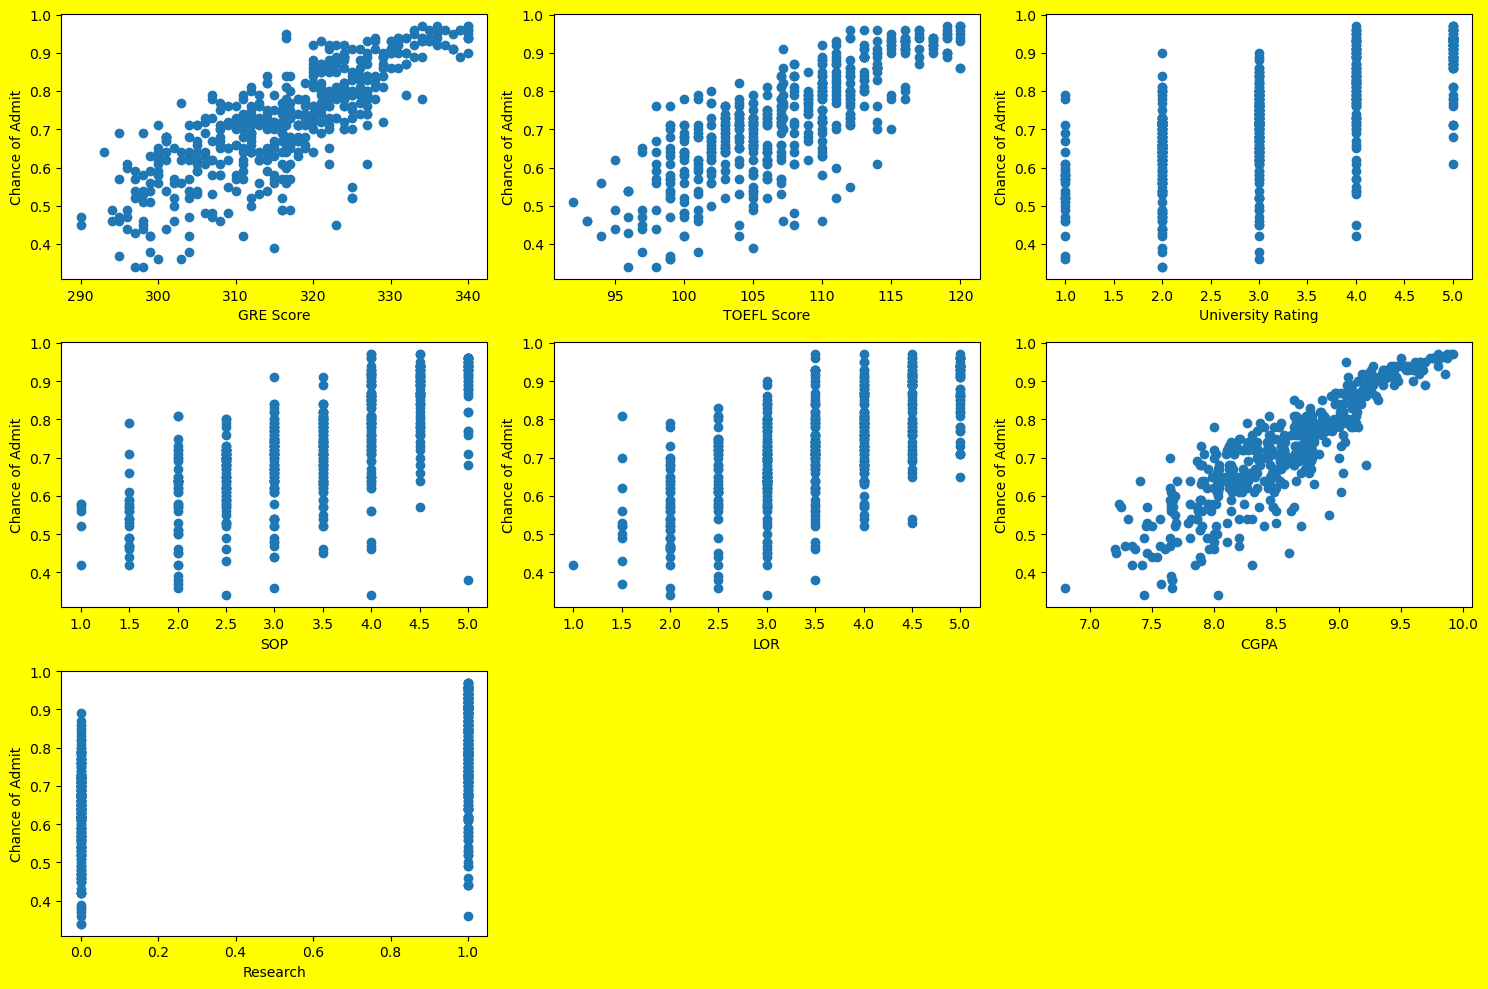

In [19]:
plt.figure(figsize=(15,10),facecolor='yellow')
plotnumber=1

for column in x:
    if plotnumber <=8:
        ax=plt.subplot(3,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Chance of Admit',fontsize=10)
        
    plotnumber+=1
    
plt.tight_layout()

In [20]:
scaler= StandardScaler()
x_scaled=scaler.fit_transform(x)


In [21]:
x_scaled

array([[ 1.84274116e+00,  1.78854223e+00,  7.82009548e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.82009548e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.04622593e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66864169e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.82009548e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.82009548e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

In [22]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |    

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=348)
y_train.head()

459    0.89
174    0.87
399    0.95
374    0.39
355    0.73
Name: Chance of Admit, dtype: float64

In [24]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [25]:
df.tail(2)

,Unnamed: 0,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
498,498,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73
499,499,327.0,113.0,4.0,4.5,4.5,9.04,0,0.84


In [26]:
print('Chance of Admission is :',regression.predict(scaler.transform([[327.0, 113.0, 4.0, 4.5, 4.5, 9.04, 0]])))

Chance of Admission is : [0.82445851]


In [27]:
#you have save model and later you can use prediction


In [28]:
pickle.dump(regression,open('reg_model','wb'))

In [29]:
loaded_model=pickle.load(open('reg_model','rb'))
a=loaded_model.predict(scaler.transform([[314,103,2,2,3,8.21,0]]))

# lets check how well modell fit on train data 

In [30]:
regression.score(x_train,y_train)

0.82855357382842

In [31]:
regression.score(x_test,y_test)

0.7928310580010802

In [32]:
y_pred=regression.predict(x_test)

In [33]:
y_pred

array([0.8207641 , 0.94873455, 0.91113259, 0.61044355, 0.66137595,
       0.60352359, 0.83223756, 0.63090419, 0.78083483, 0.76003632,
       0.61343331, 0.5171975 , 0.84481161, 0.47026296, 0.9080331 ,
       0.62012908, 0.73074873, 0.63424789, 0.82329681, 0.57632803,
       0.80849253, 0.75415425, 0.65115419, 0.53199278, 0.55202691,
       0.49318412, 0.8954953 , 0.77677743, 0.72036651, 0.42326242,
       0.82315696, 0.79339286, 0.62530834, 0.67328918, 0.77417537,
       0.63745613, 0.80739236, 0.78788545, 0.58911428, 0.66156995,
       0.73593055, 0.59762008, 0.86327735, 0.94441147, 0.98184889,
       0.51308745, 0.77626965, 0.92424654, 0.63718128, 0.96940982,
       0.65572611, 0.63867889, 0.81411786, 0.73643354, 0.68692311,
       0.55261258, 0.43652872, 0.64497596, 0.68382796, 0.68701788,
       0.86409285, 0.67198884, 0.78792379, 0.65534022, 0.95792159,
       0.61596565, 0.72449619, 0.53769901, 0.59184804, 0.78917924,
       0.74441132, 0.6447335 , 0.99270469, 0.66219368, 0.65200

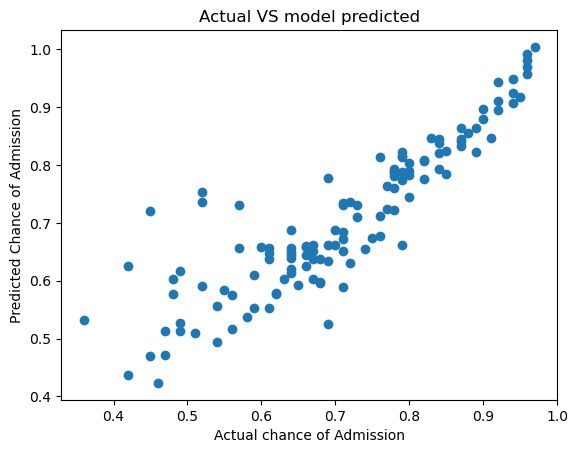

In [34]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual chance of Admission')
plt.ylabel('Predicted Chance of Admission')
plt.title('Actual VS model predicted')
plt.show()

In [35]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [36]:
y_pred=regression.predict(x_test)

In [37]:
mean_absolute_error(y_test,y_pred)   

0.04421359936541998

In [38]:
mean_squared_error(y_test,y_pred)

0.004309172332351598

In [39]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.06564428636485888

In [40]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [41]:
lasscv=LassoCV(alphas=None,max_iter=100,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [42]:
alpha=lasscv.alpha_
alpha

3.6581160575233456e-05

In [43]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=3.6581160575233456e-05)

In [44]:
lasso_reg.score(x_test,y_test)

0.7929405985679443

# Ridge Regreasion model

In [46]:
ridgescv=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgescv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [47]:
ridgescv.alpha_

0.011

In [48]:
ridge_model=Ridge(alpha=ridgescv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.011)

In [49]:
   ridge_model.score(x_test,y_test)

0.7928315548978402

In [52]:
np.arange(1,10,2)

array([1, 3, 5, 7, 9])